# Cole Weber
## Week 15 - 5/1/2021
### Continued Python Data Cleaning and Visualization Project - Stock market

In [1]:
import pandas as pd
import numpy as np
from numpy.random import randn

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('AMZN-1.csv')
data.head(10)

,Date,Source,Open,High,Low,Close,Adj Close,Volume,Stock
0,1/3/2012,yahoo,175.889999,179.479996,175.550003,179.029999,179.029999,5110800,amazon
1,1/4/2012,yahoo,179.210007,180.500000,176.070007,177.509995,177.509995,4205200,amazon
2,1/5/2012,yahoo,175.940002,178.250000,174.050003,177.610001,177.610001,3809100,amazon
3,1/6/2012,yahoo,178.070007,184.649994,177.500000,182.610001,182.610001,7008400,amazon
4,1/9/2012,yahoo,182.759995,184.369995,177.000000,178.559998,178.559998,5056900,amazon
5,1/10/2012,yahoo,181.100006,182.399994,177.100006,179.339996,179.339996,3985800,amazon
6,1/11/2012,yahoo,179.639999,180.770004,178.190002,178.899994,178.899994,3102700,amazon
7,1/12/2012,yahoo,179.419998,179.490005,175.750000,175.929993,175.929993,5385800,amazon
8,1/13/2012,yahoo,175.809998,178.800003,173.500000,178.419998,178.419998,4753500,amazon
9,1/17/2012,yahoo,180.149994,183.300003,178.509995,181.660004,181.660004,5644500,amazon


In [3]:
data.tail(10)

,Date,Source,Open,High,Low,Close,Adj Close,Volume,Stock
2232,11/13/2020,yahoo,3122.000000,3141.719971,3085.389893,3128.810059,3128.810059,3756200,amazon
2233,11/16/2020,yahoo,3093.199951,3142.699951,3072.689941,3131.060059,3131.060059,3808700,amazon
2234,11/17/2020,yahoo,3183.540039,3189.250000,3135.260010,3135.659912,3135.659912,3444700,amazon
2235,11/18/2020,yahoo,3134.000000,3140.000000,3105.100098,3105.459961,3105.459961,2916800,amazon
2236,11/19/2020,yahoo,3105.310059,3125.000000,3080.919922,3117.020020,3117.020020,3010300,amazon
2237,11/20/2020,yahoo,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374400,amazon
2238,11/23/2020,yahoo,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708900,amazon
2239,11/24/2020,yahoo,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602100,amazon
2240,11/25/2020,yahoo,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790400,amazon
2241,11/27/2020,yahoo,3211.260010,3216.189941,3190.050049,3195.340088,3195.340088,2392900,amazon


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2241.000000,2240.000000,2242.000000,2239.000000,2241.000000,2.242000e+03
mean,991.401419,1002.190218,979.221717,991.895355,991.190696,4.118187e+06
std,802.269032,811.968123,790.843600,801.664757,801.654109,2.278888e+06
min,173.809998,178.250000,172.000000,175.929993,175.929993,0.000000e+00
25%,320.359985,323.687500,315.807487,321.385010,320.510010,2.688550e+06
50%,717.380005,723.394989,712.629975,719.299988,719.070007,3.528700e+06
75%,1660.000000,1679.964966,1633.707459,1661.830017,1660.510010,4.839800e+06
max,3547.000000,3552.250000,3486.689941,3531.449951,3531.449951,2.385610e+07


In [5]:
data.columns

Index(['Date', 'Source', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Stock'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242 entries, 0 to 2241
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2242 non-null   object 
 1   Source     2242 non-null   object 
 2   Open       2241 non-null   float64
 3   High       2240 non-null   float64
 4   Low        2242 non-null   float64
 5   Close      2239 non-null   float64
 6   Adj Close  2241 non-null   float64
 7   Volume     2242 non-null   int64  
 8   Stock      2242 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 157.8+ KB


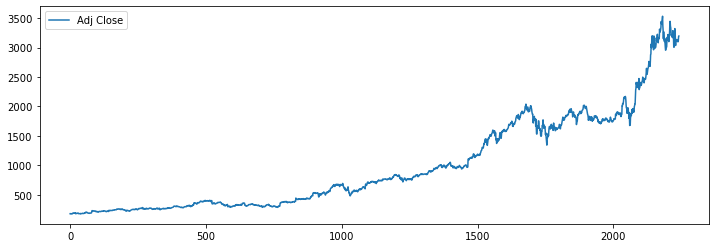

In [7]:
data['Adj Close'].plot(legend=True, figsize=(12,4))

In [8]:
# count the number of numerical and non-numerical columns
from pandas.api.types import is_numeric_dtype
n=0
for c in data.columns:
    if is_numeric_dtype(data[c]):
        n += 1
        
print("Numerical Columns:" , n, 'Non-Numerical Columns:',len(data.columns) - n)

Numerical Columns: 6 Non-Numerical Columns: 3


In [9]:
# Number of rows that have missing values
data.isnull().sum()

Date         0
Source       0
Open         1
High         2
Low          0
Close        3
Adj Close    1
Volume       0
Stock        0
dtype: int64

In [10]:
# Data cleaning to prepare data for analytics (Handlind missing value)
data.dropna(inplace=True) # Drops any rows containing null values

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235 entries, 0 to 2241
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2235 non-null   object 
 1   Source     2235 non-null   object 
 2   Open       2235 non-null   float64
 3   High       2235 non-null   float64
 4   Low        2235 non-null   float64
 5   Close      2235 non-null   float64
 6   Adj Close  2235 non-null   float64
 7   Volume     2235 non-null   int64  
 8   Stock      2235 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 174.6+ KB


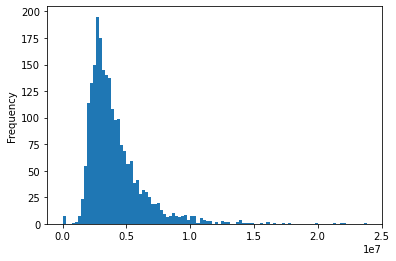

In [12]:
# Clean abnormal values
data['Volume'].plot(kind='hist', bins=100)

In [13]:
data['Volume'].min()

0

In [14]:
data['Volume'].max()

23856100

In [15]:
data['Volume'].sort_values(ascending=True).head(20)

29            0
114           1
18            5
161           6
47           23
90           25
66           78
2007     881300
245      984400
1001    1091200
126     1331700
879     1343400
426     1350600
376     1373000
497     1380400
405     1415000
411     1422600
415     1457100
1164    1458800
403     1504500
Name: Volume, dtype: int64

In [16]:
# Remove any values with trading volumes less than 100k
data=data[data["Volume"] > 100000]
data.shape

(2228, 9)

In [17]:
data["Volume"].sort_values(ascending=True).head(20)

2007     881300
245      984400
1001    1091200
126     1331700
879     1343400
426     1350600
376     1373000
497     1380400
405     1415000
411     1422600
415     1457100
1164    1458800
403     1504500
749     1513800
1167    1524100
151     1534300
417     1534700
152     1548100
1160    1563300
416     1566400
Name: Volume, dtype: int64

In [19]:
#Remove all rows that have a constant/single value (Source and Stock)
data.head(20)

,Date,Source,Open,High,Low,Close,Adj Close,Volume,Stock
0,1/3/2012,yahoo,175.889999,179.479996,175.550003,179.029999,179.029999,5110800,amazon
1,1/4/2012,yahoo,179.210007,180.500000,176.070007,177.509995,177.509995,4205200,amazon
2,1/5/2012,yahoo,175.940002,178.250000,174.050003,177.610001,177.610001,3809100,amazon
3,1/6/2012,yahoo,178.070007,184.649994,177.500000,182.610001,182.610001,7008400,amazon
4,1/9/2012,yahoo,182.759995,184.369995,177.000000,178.559998,178.559998,5056900,amazon
5,1/10/2012,yahoo,181.100006,182.399994,177.100006,179.339996,179.339996,3985800,amazon
6,1/11/2012,yahoo,179.639999,180.770004,178.190002,178.899994,178.899994,3102700,amazon
7,1/12/2012,yahoo,179.419998,179.490005,175.750000,175.929993,175.929993,5385800,amazon
8,1/13/2012,yahoo,175.809998,178.800003,173.500000,178.419998,178.419998,4753500,amazon
9,1/17/2012,yahoo,180.149994,183.300003,178.509995,181.660004,181.660004,5644500,amazon


In [26]:
# Check if certain columns have constant values
constant_columns = []
for c in data.columns:
    n = len(data[c].unique())
    if n == 1:
        constant_columns.append(c)
print('Constant Columns:',  constant_columns)

Constant Columns: ['Source', 'Stock']


In [27]:
# drop remove constant columns from data set
data.drop(columns=constant_columns, inplace=True)

In [30]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2012,175.889999,179.479996,175.550003,179.029999,179.029999,5110800
1,1/4/2012,179.210007,180.500000,176.070007,177.509995,177.509995,4205200
2,1/5/2012,175.940002,178.250000,174.050003,177.610001,177.610001,3809100
3,1/6/2012,178.070007,184.649994,177.500000,182.610001,182.610001,7008400
4,1/9/2012,182.759995,184.369995,177.000000,178.559998,178.559998,5056900
...,...,...,...,...,...,...,...
2237,11/20/2020,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374400
2238,11/23/2020,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708900
2239,11/24/2020,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602100
2240,11/25/2020,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790400


In [35]:
# Adding Year, Month, Day, Columns
dateObject = pd.DatetimeIndex(data['Date'])

In [37]:
data["Year"] = dateObject.year
data["Month"] = dateObject.month
data["Day"] = dateObject.day

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2228 entries, 0 to 2241
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2228 non-null   object 
 1   Open       2228 non-null   float64
 2   High       2228 non-null   float64
 3   Low        2228 non-null   float64
 4   Close      2228 non-null   float64
 5   Adj Close  2228 non-null   float64
 6   Volume     2228 non-null   int64  
 7   Year       2228 non-null   int64  
 8   Month      2228 non-null   int64  
 9   Day        2228 non-null   int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 191.5+ KB


In [40]:
# Transform the values of the Volume entries to thousands
data["Volume"] = data["Volume"] / 1000
data.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,1/3/2012,175.889999,179.479996,175.550003,179.029999,179.029999,5110.8,2012,1,3
1,1/4/2012,179.210007,180.500000,176.070007,177.509995,177.509995,4205.2,2012,1,4
2,1/5/2012,175.940002,178.250000,174.050003,177.610001,177.610001,3809.1,2012,1,5
3,1/6/2012,178.070007,184.649994,177.500000,182.610001,182.610001,7008.4,2012,1,6
4,1/9/2012,182.759995,184.369995,177.000000,178.559998,178.559998,5056.9,2012,1,9
5,1/10/2012,181.100006,182.399994,177.100006,179.339996,179.339996,3985.8,2012,1,10
6,1/11/2012,179.639999,180.770004,178.190002,178.899994,178.899994,3102.7,2012,1,11
7,1/12/2012,179.419998,179.490005,175.750000,175.929993,175.929993,5385.8,2012,1,12
8,1/13/2012,175.809998,178.800003,173.500000,178.419998,178.419998,4753.5,2012,1,13
9,1/17/2012,180.149994,183.300003,178.509995,181.660004,181.660004,5644.5,2012,1,17


In [42]:
# Using visualization for data analysis
data[['Year', 'Volume']].groupby('Year').sum()

,Volume
Year,
2012,975492.4
2013,747905.7
2014,1029066.7
2015,957102.0
2016,1038756.3
2017,882705.4
2018,1417897.6
2019,974729.4
2020,1166035.7


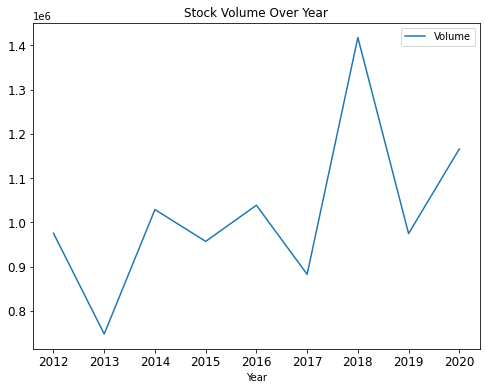

In [47]:
data[['Year', 'Volume']].groupby('Year').sum().plot(figsize=(8,6), y="Volume", fontsize=12, title="Stock Volume Over Year")

plt.ylabel = "Stock's Volume"

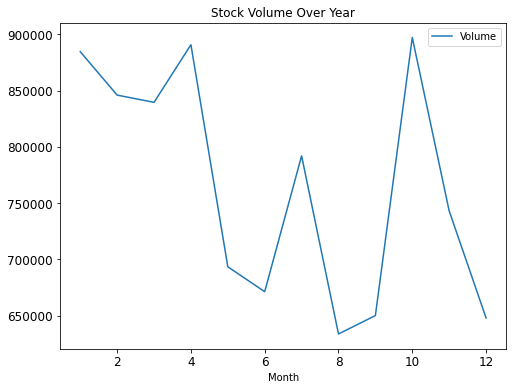

In [50]:
data[[ 'Month', 'Volume']].groupby( 'Month').sum().plot(figsize=(8,6), y="Volume", fontsize=12, title="Stock Volume Over Year")


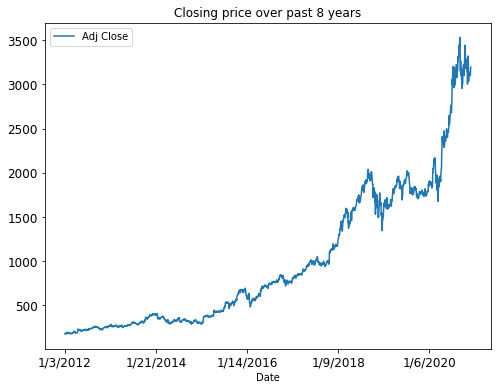

In [51]:
data[[ 'Date', 'Adj Close']].plot(figsize=(8,6), x='Date', y="Adj Close", fontsize=12, title="Closing price over past 8 years")


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2228 entries, 0 to 2241
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2228 non-null   object 
 1   Open       2228 non-null   float64
 2   High       2228 non-null   float64
 3   Low        2228 non-null   float64
 4   Close      2228 non-null   float64
 5   Adj Close  2228 non-null   float64
 6   Volume     2228 non-null   float64
 7   Year       2228 non-null   int64  
 8   Month      2228 non-null   int64  
 9   Day        2228 non-null   int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 191.5+ KB


In [54]:
data["Date"] = pd.to_datetime(data["Date"], format="%m/%d/%Y")
data

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2012-01-03,175.889999,179.479996,175.550003,179.029999,179.029999,5110.8,2012,1,3
1,2012-01-04,179.210007,180.500000,176.070007,177.509995,177.509995,4205.2,2012,1,4
2,2012-01-05,175.940002,178.250000,174.050003,177.610001,177.610001,3809.1,2012,1,5
3,2012-01-06,178.070007,184.649994,177.500000,182.610001,182.610001,7008.4,2012,1,6
4,2012-01-09,182.759995,184.369995,177.000000,178.559998,178.559998,5056.9,2012,1,9
...,...,...,...,...,...,...,...,...,...,...
2237,2020-11-20,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374.4,2020,11,20
2238,2020-11-23,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708.9,2020,11,23
2239,2020-11-24,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602.1,2020,11,24
2240,2020-11-25,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790.4,2020,11,25


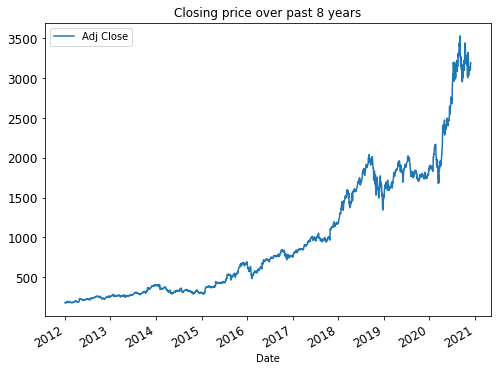

In [55]:
data[[ 'Date', 'Adj Close']].plot(figsize=(8,6), x='Date', y="Adj Close", fontsize=12, title="Closing price over past 8 years")


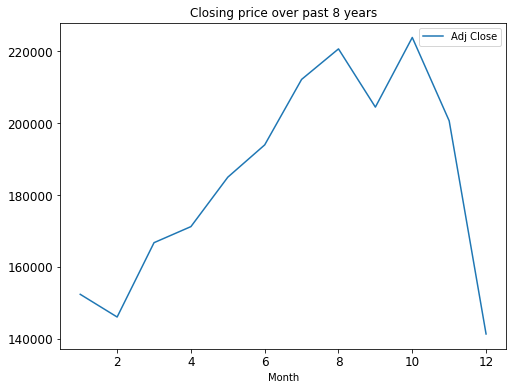

In [58]:
data[[ 'Month', 'Adj Close']].groupby("Month").sum().plot(figsize=(8,6), y="Adj Close", fontsize=12, title="Closing price over past 8 years")


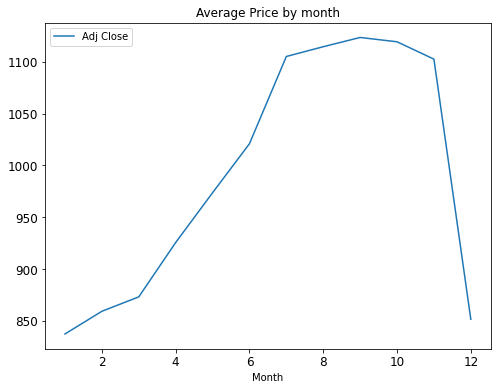

In [61]:
data[[ 'Month', 'Adj Close']].groupby("Month").mean().plot(figsize=(8,6), y="Adj Close", fontsize=12, title="Average Price by month")


In [62]:
#Plot the Adj Closing Prices that are smaller than the Open prices after 2015.
filter1 = data[data["Year"] > 2015]
len(filter1)

1236

In [65]:
filter2 = data[data["Adj Close"] < data['Open']]
len(filter2)

1105

In [69]:
filter2[['Adj Close', 'Open']]

,Adj Close,Open
1,177.509995,179.210007
4,178.559998,182.759995
5,179.339996,181.100006
6,178.899994,179.639999
7,175.929993,179.419998
...,...,...
2234,3135.659912,3183.540039
2235,3105.459961,3134.000000
2237,3099.399902,3117.020020
2238,3098.389893,3116.699951


In [80]:
data['Percent Change'] = round((((data['Open'] - data['Adj Close']) / data['Open']) * 100), 3)

In [81]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Percent Change
0,2012-01-03,175.889999,179.479996,175.550003,179.029999,179.029999,5110.8,2012,1,3,-1.785
1,2012-01-04,179.210007,180.500000,176.070007,177.509995,177.509995,4205.2,2012,1,4,0.949
2,2012-01-05,175.940002,178.250000,174.050003,177.610001,177.610001,3809.1,2012,1,5,-0.949
3,2012-01-06,178.070007,184.649994,177.500000,182.610001,182.610001,7008.4,2012,1,6,-2.550
4,2012-01-09,182.759995,184.369995,177.000000,178.559998,178.559998,5056.9,2012,1,9,2.298
...,...,...,...,...,...,...,...,...,...,...,...
2237,2020-11-20,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374.4,2020,11,20,0.565
2238,2020-11-23,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708.9,2020,11,23,0.587
2239,2020-11-24,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602.1,2020,11,24,-0.566
2240,2020-11-25,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790.4,2020,11,25,-1.375


In [82]:
filter3 = data['Year'] > 2015
filter4 = data['Adj Close'] < data['Open']

In [83]:
result = data[filter3 & filter4]
result

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Percent Change
1006,2016-01-04,656.289978,657.719971,627.510010,636.989990,636.989990,9314.5,2016,1,4,2.941
1007,2016-01-05,646.859985,646.909973,627.650024,633.789978,633.789978,5822.6,2016,1,5,2.021
1009,2016-01-07,621.799988,630.000000,605.210022,607.940002,607.940002,7074.9,2016,1,7,2.229
1010,2016-01-08,619.659973,624.140015,606.000000,607.049988,607.049988,5512.9,2016,1,8,2.035
1012,2016-01-12,625.250000,625.989990,612.239990,617.890015,617.890015,4724.1,2016,1,12,1.177
...,...,...,...,...,...,...,...,...,...,...,...
2234,2020-11-17,3183.540039,3189.250000,3135.260010,3135.659912,3135.659912,3444.7,2020,11,17,1.504
2235,2020-11-18,3134.000000,3140.000000,3105.100098,3105.459961,3105.459961,2916.8,2020,11,18,0.911
2237,2020-11-20,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374.4,2020,11,20,0.565
2238,2020-11-23,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708.9,2020,11,23,0.587


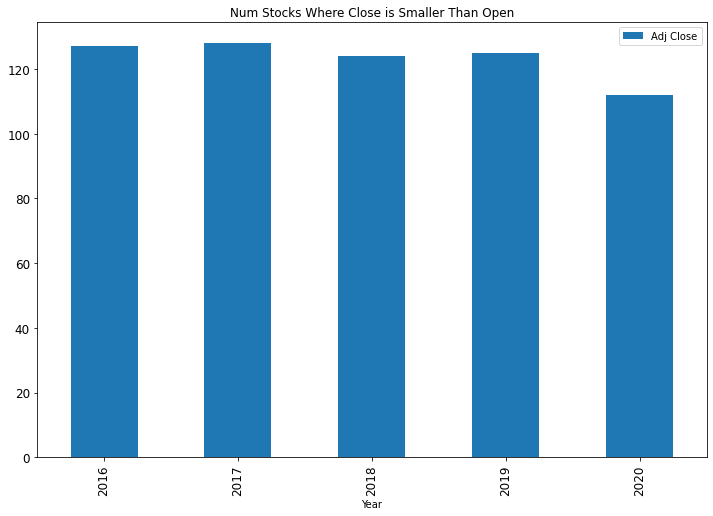

In [89]:
result[['Adj Close', 'Year']].groupby('Year').count().plot.bar(figsize = (12, 8), y ='Adj Close', fontsize = 12, legend = True
                                                             , title = "Num Stocks Where Close is Smaller Than Open")


In [90]:
result["Open"].sum() - result['Adj Close'].sum()

11206.19128899998

In [91]:
result["Open"].mean() - result['Adj Close'].mean()

18.191868975650095

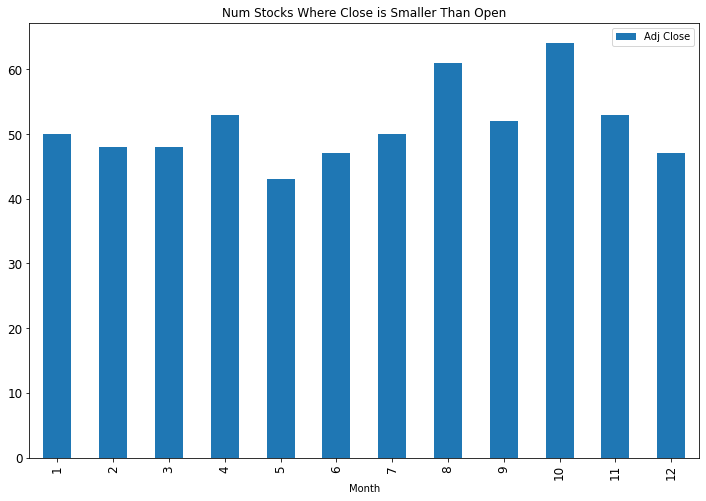

In [93]:
result[['Adj Close', 'Month']].groupby('Month').count().plot.bar(figsize = (12, 8), y ='Adj Close', fontsize = 12, legend = True
                                                             , title = "Num Stocks Where Close is Smaller Than Open")


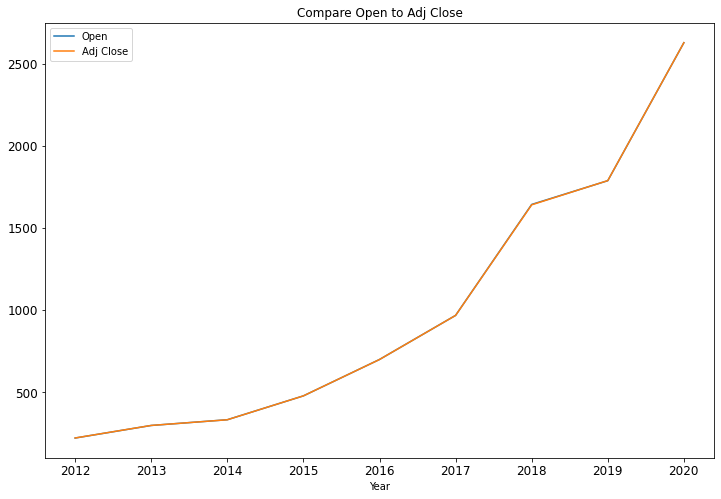

In [104]:
# Compare the opening and closing prices 
data[['Adj Close', 'Open', 'Year']].groupby('Year').mean().plot(figsize = (12, 8), y =['Open', 'Adj Close'], fontsize = 12, legend = True
                                                             , title = "Compare Open to Adj Close")


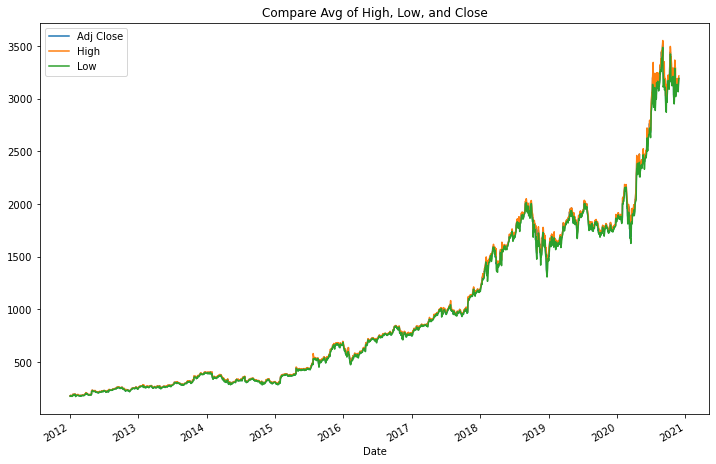

In [112]:
data[['Date', 'Adj Close', 'High', 'Low']].plot(figsize = (12,8), y = ['Adj Close', 'High', 'Low'], x = 'Date'
                                             , title = "Compare Avg of High, Low, and Close")

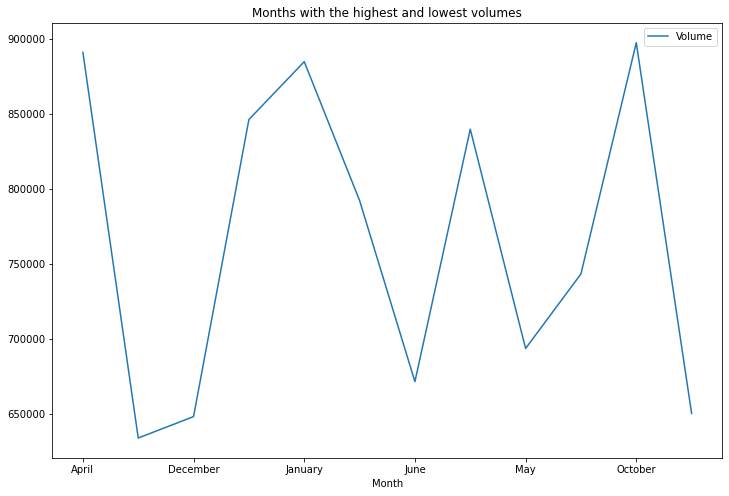

In [137]:
# Query data to develop understanding
# Find the months that have the highest and lowest volumes
data[["Month", "Volume"]].groupby('Month').sum().plot(figsize=(12,8), y = "Volume", 
                                                      title = "Months with the highest and lowest volumes")

In [122]:
data["Month"] = data["Date"].

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2228 entries, 0 to 2241
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2228 non-null   datetime64[ns]
 1   Open            2228 non-null   float64       
 2   High            2228 non-null   float64       
 3   Low             2228 non-null   float64       
 4   Close           2228 non-null   float64       
 5   Adj Close       2228 non-null   float64       
 6   Volume          2228 non-null   float64       
 7   Year            2228 non-null   int64         
 8   Month           2228 non-null   object        
 9   Day             2228 non-null   int64         
 10  Percent Change  2228 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 208.9+ KB


In [123]:
data["Month"] = dateObject.month

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2228 entries, 0 to 2241
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2228 non-null   datetime64[ns]
 1   Open            2228 non-null   float64       
 2   High            2228 non-null   float64       
 3   Low             2228 non-null   float64       
 4   Close           2228 non-null   float64       
 5   Adj Close       2228 non-null   float64       
 6   Volume          2228 non-null   float64       
 7   Year            2228 non-null   int64         
 8   Month           2228 non-null   int64         
 9   Day             2228 non-null   int64         
 10  Percent Change  2228 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 208.9 KB


In [134]:
data["Month"] = ["January" if i == 1 else "February" if i == 2 else 'March' if i == 3 else 'April' if i == 4 
                 else "May" if i == 5 else "June" if i == 6 else "July" if i ==7 else "August" if i == 8
                 else "September" if i == 9 else "October" if i == 10 else "November" if i == 11 else "December"
                 for i in data["Month"]]

In [136]:
data.tail(20)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Percent Change
2222,2020-10-30,3157.750000,3167.000000,3019.000000,3036.149902,3036.149902,8386.4,2020,October,30,3.851
2223,2020-11-02,3061.739990,3079.709961,2950.120117,3004.479980,3004.479980,7257.4,2020,November,2,1.870
2224,2020-11-03,3018.530029,3074.899902,2980.979980,3048.409912,3048.409912,4897.9,2020,November,3,-0.990
2225,2020-11-04,3159.989990,3244.850098,3139.729980,3241.159912,3241.159912,6839.0,2020,November,4,-2.569
2226,2020-11-05,3319.969971,3366.800049,3288.879883,3322.000000,3322.000000,5789.3,2020,November,5,-0.061
2227,2020-11-06,3304.639893,3322.000000,3232.000000,3311.370117,3311.370117,4647.3,2020,November,6,-0.204
2228,2020-11-09,3231.030029,3289.000000,3112.110107,3143.739990,3143.739990,7190.4,2020,November,9,2.702
2229,2020-11-10,3095.020020,3114.000000,3019.479980,3035.020020,3035.020020,6591.0,2020,November,10,1.939
2230,2020-11-11,3061.780029,3139.149902,3050.000000,3137.389893,3137.389893,4366.9,2020,November,11,-2.469
2231,2020-11-12,3159.949951,3175.879883,3086.050049,3110.280029,3110.280029,4362.0,2020,November,12,1.572


In [155]:
r = data[["Month", "Volume"]].groupby('Month').sum()
print("The month with the lowest volume", r.idxmin(), "Volume:", str((r.min() * 1000)).strip())
print("The month with the highest volume", r.idxmax(), "Volume:", str((r.max() * 1000)).strip())

The month with the lowest volume Volume    August
dtype: object Volume: Volume    633655400.0
dtype: float64
The month with the highest volume Volume    October
dtype: object Volume: Volume    897270200.0
dtype: float64


In [152]:
r = data["Volume"]
minidx = r.idxmin()
maxidx = r.idxmax()
minidx

2007

In [157]:
print("The month with the lowest volume", data.iloc[minidx]["Date"].date(), "Volume:", data.iloc[minidx]["Volume"])
print("The month with the highest volume", data.iloc[maxidx]["Date"].date(), "Volume:", data.iloc[maxidx]["Volume"])

The month with the lowest volume 2020-01-15 Volume: 2896.6
The month with the highest volume 2015-02-20 Volume: 3258.0


In [171]:
# Find the month and the day that has the lowest closing average price
monthvol = data[["Month", "Adj Close", "Day"]].groupby(["Month", "Day"]).mean()
monthvol

Adj Close
Month     Day             
April     1     882.541646
          2     897.197132
          3     971.879996
          4     786.502849
          5     872.386678
...                    ...
September 26    906.207125
          27   1013.001653
          28   1286.758341
          29   1150.633972
          30   1144.820007

[363 rows x 1 columns]

In [172]:
print("The month and day with the lowest adj close is ", monthvol.idxmin()[0], "The adj close is", monthvol.min()[0])

The month and day with the lowest adj close is  ('February', 29) The adj close is 366.105011
